<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/Fashion_MINIST_kl.wieloklasowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST

### Klasyfikator wieloklasowy - Image Recognition 

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

#### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.8.2'

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

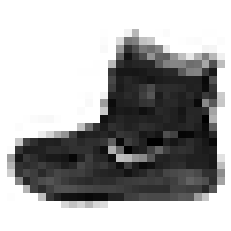

In [4]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

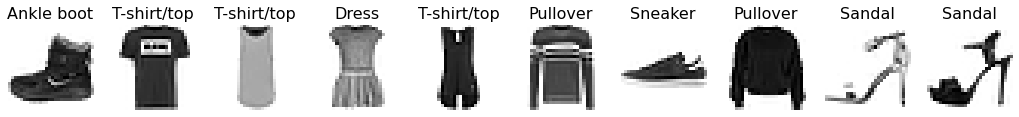

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [6]:
X_train = X_train / 255.
X_test = X_test / 255.

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

Budowa modelu

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**epochs** - ile razy zestaw treningowy zostanie przetworzony przez model.
Przy każdej iteracji optymalizator próbuje dopasować wagi, aby 
funkcja celu została zminimalizowana.
 
**batch_size** - liczba przykładów treningowych po której następuje aktualizacji wag

**validation_split** - procent danych użytych do walidacji

In [14]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2678 - accuracy: 0.9066 - val_loss: 0.3965 - val_accuracy: 0.8833
Epoch 2/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2608 - accuracy: 0.9111 - val_loss: 0.4039 - val_accuracy: 0.8850
Epoch 3/40
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9104 - val_loss: 0.4418 - val_accuracy: 0.8769
Epoch 4/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2551 - accuracy: 0.9138 - val_loss: 0.4296 - val_accuracy: 0.8727
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2464 - accuracy: 0.9180 - val_loss: 0.4495 - val_accuracy: 0.8792
Epoch 6/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2442 - accuracy: 0.9177 - val_loss: 0.4301 - val_accuracy: 0.8867
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2377 - accuracy: 0.9193 - val_loss: 0.4456 - val_accuracy:

In [10]:
#Wszystkich próbek mieliśmy 70000, do zbiori treningowego daliśmy 60000, 10000 do zbioru testowego
#następnie zbiór trenignowy podzieliliśmy na 48000 i 12000 próbek walidacyjnych(uczą model)

In [15]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.267823,0.906646,0.396472,0.883333,0
1,0.260850,0.911083,0.403865,0.885000,1
2,0.258223,0.910396,0.441803,0.876917,2
3,0.255097,0.913833,0.429560,0.872667,3
4,0.246411,0.917979,0.449529,0.879250,4
5,0.244184,0.917667,0.430103,0.886750,5
6,0.237699,0.919312,0.445588,0.874833,6
7,0.234913,0.920750,0.431377,0.888250,7
8,0.232784,0.921479,0.455754,0.885833,8
9,0.228853,0.923833,0.477944,0.885750,9


In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8765000104904175


### <a name='a4'></a> Predykcja na podstawie modelu:
* **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu
* **model.predict_classes()** - pozwala zwrócić odpowiednio przewidziane klasy
* **model.predict_proba(), model.predict()** - pozwala zwrócić prawdopodobieństwo danej klasy

In [18]:
predictions = model.predict(X_test)
predictions

array([[0.            , 0.            , 0.            , ..., 0.000000000218, 0.            , 1.            ],
       [0.000000000018, 0.            , 1.            , ..., 0.            , 0.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.            , 0.            , 0.            , ..., 0.            , 1.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.            , 0.000000000037, 0.            , ..., 0.000000068071, 0.000000141415, 0.000000009556]], dtype=float32)

In [19]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.007673,0.000000,0.000007,0.000000,0.000000,0.000000,0.992320,0.000000,0.000000,0.000000


In [24]:
predictions_cls =np.argmax(model.predict(X_test), axis=-1)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

In [39]:
#@title Wybierz indeks zdjęcia:
idx = 3766 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=600, height=300,
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a6'></a> Błędnie sklasyfikowane obrazy

In [42]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 237 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a7'></a> Klika możliwości poprawy modeli:
* zwiększenie liczby epok
* zwiększenie/zmniejszenie parametrów uczenia, stronjenie hiperparametrów
* zwiększenie/zmniejszenie liczby neuronów wewnątrz wartsw uktytych
* zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu
* zwiększenie/zmniejszenie liczby warstw ukrytych
* zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout
